In [2]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

In [4]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
import  pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

font = { 'family': 'DejaVu Sans',
    'weight' : "normal",
        'size'   : 22}
plt.rc('font', **font)
# import pydoop.hdfs as hd
# with hd.open("/home/file.csv") as f:
#     print f.read()

In [26]:
# df= spark.read.csv("hdfs://namenode:9000/nifi/confirm2022-01-0610-46-07.csv")
confirmed = spark.read.format("csv").option("header", "true").load("hdfs://namenode:9000/nifi/confirm2022-01-06.csv").toPandas()
recovered = spark.read.format("csv").option("header", "true").load("hdfs://namenode:9000/nifi/recovered2022-01-06.csv").toPandas()
death = spark.read.format("csv").option("header", "true").load("hdfs://namenode:9000/nifi/death2022-01-06.csv").toPandas()

In [27]:
# confirmed=pd.read_csv("Covid-20220106T131327Z-001/Covid/time_series_covid19_confirmed_global.csv")
# recovered=pd.read_csv("Covid-20220106T131327Z-001/Covid/time_series_covid19_recovered_global.csv")
# death=pd.read_csv("Covid-20220106T131327Z-001/Covid/time_series_covid19_deaths_global.csv")

In [28]:
confirmed = confirmed.drop('Province/State', 1)
confirmed = confirmed.drop('Lat', 1)
confirmed = confirmed.drop('Long', 1)
recovered = recovered.drop('Province/State', 1)
recovered = recovered.drop('Lat', 1)
recovered = recovered.drop('Long', 1)
death = death.drop('Province/State', 1)
death = death.drop('Lat', 1)
death = death.drop('Long', 1)

In [29]:
confirmed=confirmed.astype(dict.fromkeys(confirmed.columns[1:], 'int64'),errors='ignore')
recovered=recovered.astype(dict.fromkeys(recovered.columns[1:], 'int64'),errors='ignore')
death=death.astype(dict.fromkeys(death.columns[1:], 'int64'),errors='ignore')

In [31]:
confirmed = confirmed.groupby(by=["Country/Region"],as_index=False).sum()
recovered = recovered.groupby(by=["Country/Region"],as_index=False).sum()
death = death.groupby(by=["Country/Region"],as_index=False).sum()

In [32]:

confirmed.tail(1)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22
195,Zimbabwe,0,0,0,0,0,0,0,0,0,...,205449,207548,207548,211728,213258,214214,214214,216087,217678,219057


In [33]:
confirmed['Total'] = confirmed["12/16/21"]
recovered['Total'] = recovered["8/4/21"]
death['Total'] = death["12/16/21"]

182    50536051
79     34726049
23     22209368
186    11161497
144     9955308
181     9120394
62      8564979
66      6741968
81      6165454
164     5422168
191     1493237
Name: Total, dtype: int64


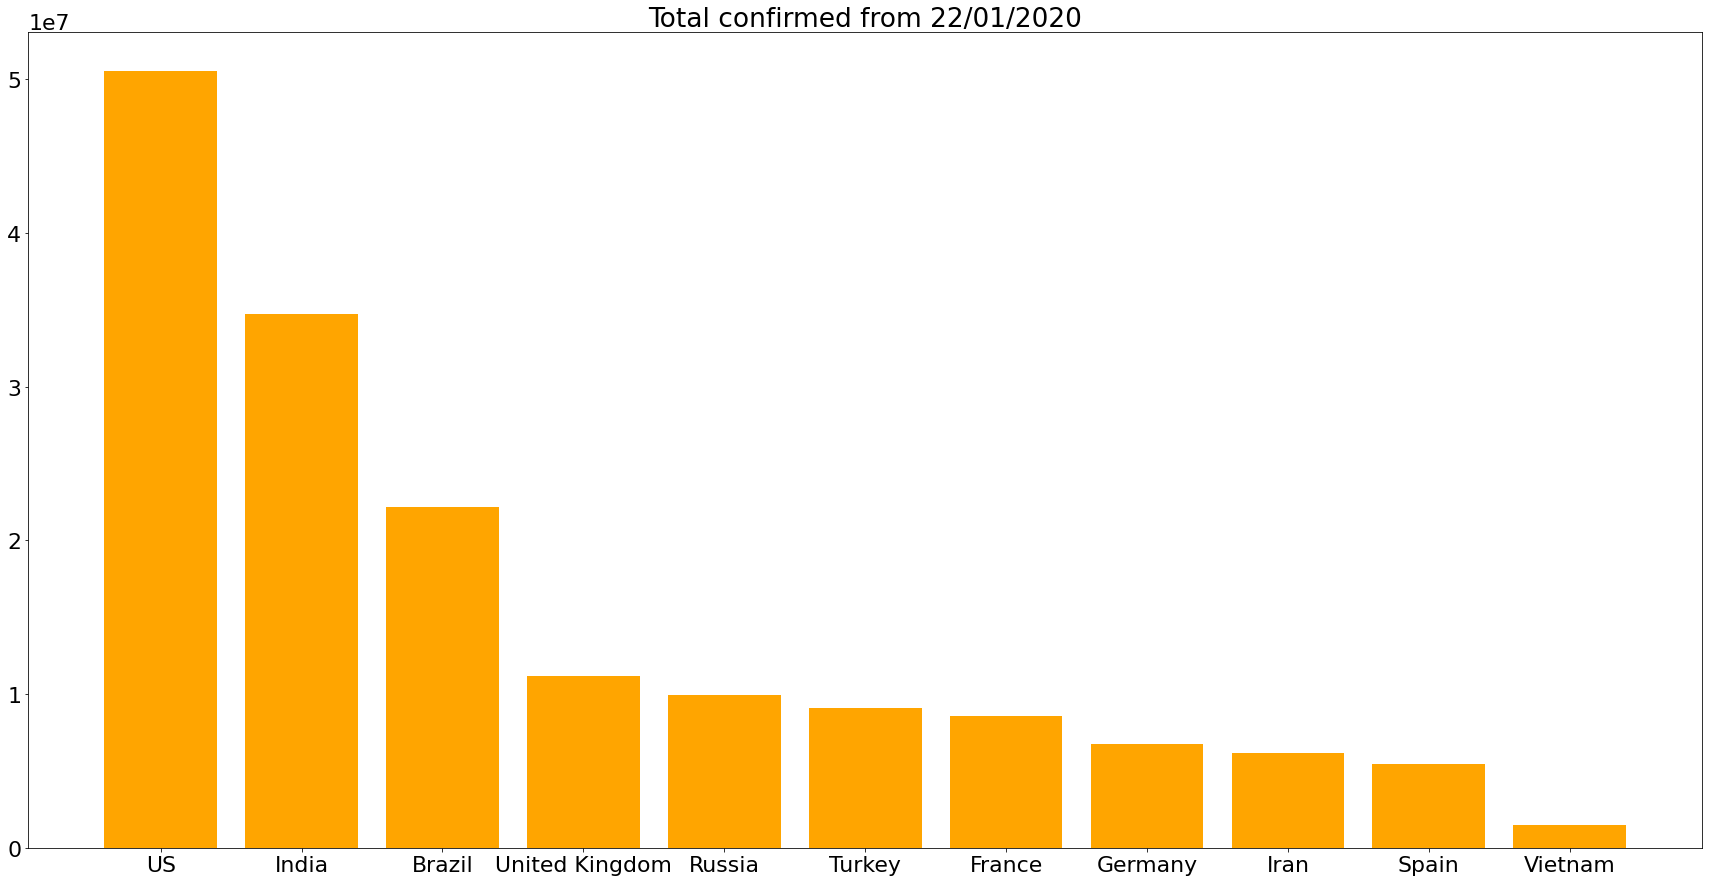

In [35]:
plt.title("Total confirmed from 22/01/2020")
df1 = confirmed.sort_values('Total',ascending = False).head(10)
entry = confirmed.loc[confirmed['Country/Region'] == 'Vietnam']
df1 = pd.concat([df1,entry])

# Make a random dataset:
height = df1["Total"]
bars = df1["Country/Region"]
y_pos = np.arange(len(bars))
print(height)
# df1.set_index('Country/Region')
# sns.barplot(x=df1.index, y=df1["Total"])
# df1
# plt.figure(figsize=(12,12))
# Create bars
plt.bar(y_pos, height, color = 'orange')
# sns.barplot(x=df1.index, y=df1["Total"])
# # Create names on the x-axis
plt.xticks(y_pos, bars)
    
# # Show graphic
plt.rcParams["figure.figsize"]=(30, 15)
plt.show()

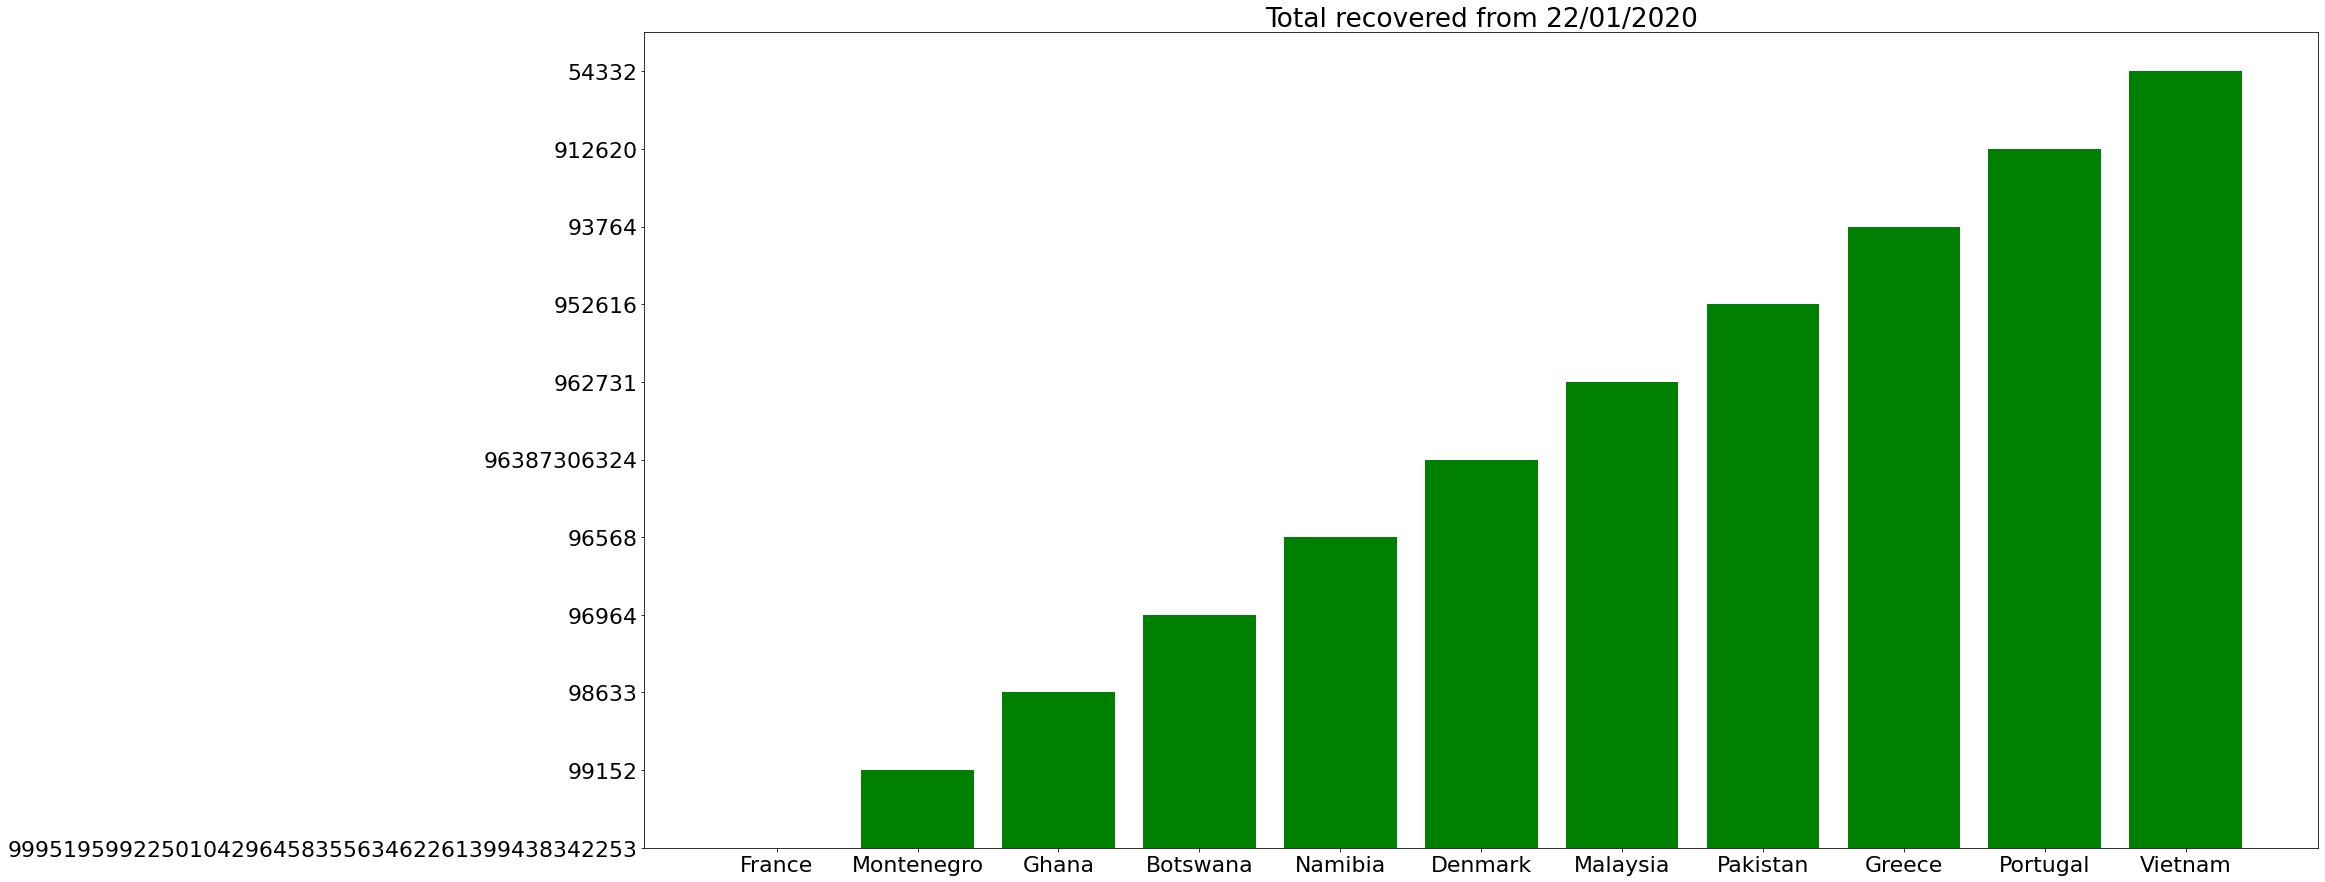

In [14]:
plt.title("Total recovered from 22/01/2020")
df2 = recovered.sort_values('Total',ascending = False).head(10)
entry = recovered.loc[recovered['Country/Region'] == 'Vietnam']
df2 = pd.concat([df2,entry])

# Make a random dataset:
height = df2["Total"]
bars = df2["Country/Region"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color='green')

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.rcParams["figure.figsize"]=(30, 15)
plt.show()

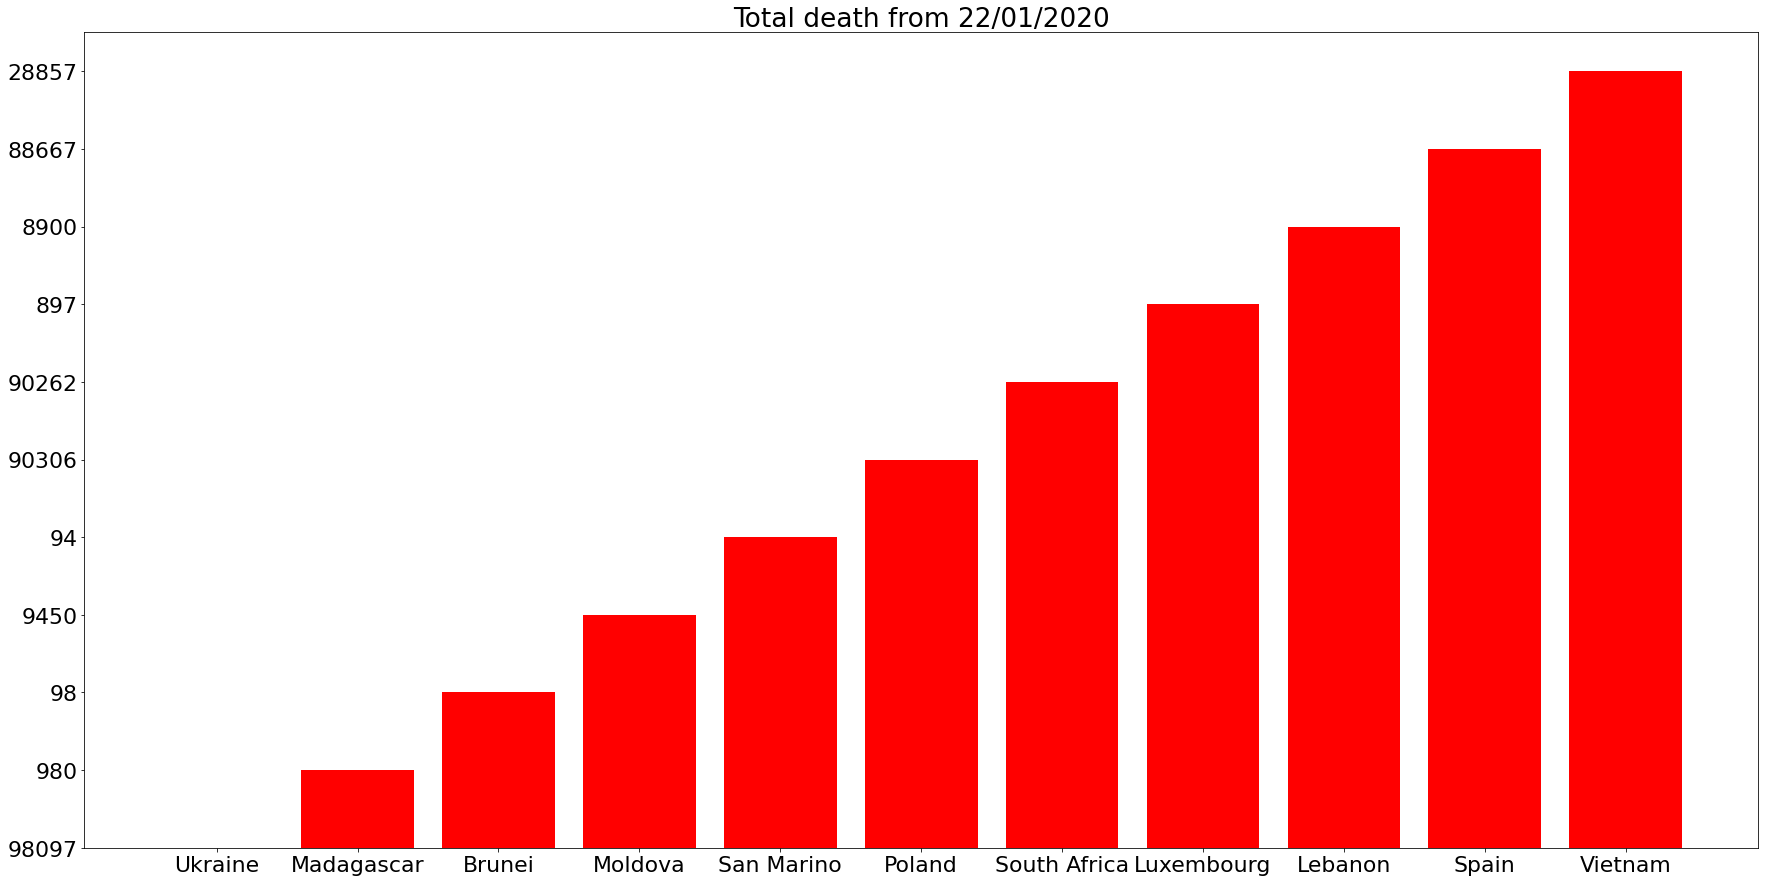

In [60]:
plt.title("Total death from 22/01/2020")
df3 = death.sort_values('Total',ascending = False).head(10)
entry = death.loc[death['Country/Region'] == 'Vietnam']
df3 = pd.concat([df3,entry])

# Make a random dataset:
height = df3["Total"]
bars = df3["Country/Region"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color = 'red')

# Create names on the x-axis
plt.xticks(y_pos, bars)
    
# Show graphic
plt.rcParams["figure.figsize"]=(30, 15)
plt.show()